In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("Group_2_data_cleaned.csv")
data=data.drop('Unnamed: 0',axis=1)
data

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y

0       0
1       1
2       1
3       0
4       1
       ..
1348    1
1349   -1
1350    1
1351    1
1352   -1
Name: Result, Length: 1353, dtype: int64

In [4]:
sfs_rf = SFS(estimator=RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62), 
           k_features=(3, 9),
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5)


sfs_rf.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs_rf.k_score_, sfs_rf.k_feature_idx_))
# print('all subsets:\n', sfs_rf.subsets_)


best combination (ACC: 0.902): (0, 1, 2, 3, 4, 5, 6, 8)



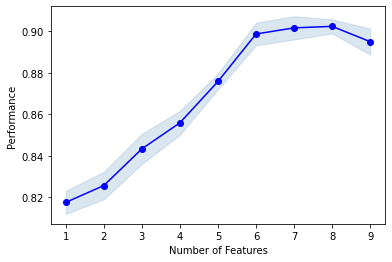

In [5]:
plot_sfs(sfs_rf.get_metric_dict(), kind='std_err');

In [6]:
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sfs_rf.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.8007380073800738, 0.8265682656826568, 0.808...",0.817455,"(SFH,)"
2,"(0, 1)","[0.8081180811808119, 0.8302583025830258, 0.811...",0.825592,"(SFH, popUpWidnow)"
3,"(0, 1, 4)","[0.8265682656826568, 0.8671586715867159, 0.845...",0.843305,"(SFH, popUpWidnow, URL_of_Anchor)"
4,"(0, 1, 2, 4)","[0.8376383763837638, 0.8708487084870848, 0.848...",0.855884,"(SFH, popUpWidnow, SSLfinal_State, URL_of_Anchor)"
5,"(0, 1, 2, 3, 4)","[0.8671586715867159, 0.8856088560885609, 0.867...",0.875837,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
6,"(0, 1, 2, 3, 4, 6)","[0.8819188191881919, 0.8929889298892989, 0.900...",0.898759,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
7,"(0, 1, 2, 3, 4, 6, 8)","[0.8819188191881919, 0.8966789667896679, 0.907...",0.901714,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.8892988929889298, 0.9040590405904059, 0.907...",0.902444,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8745387453874539, 0.8966789667896679, 0.889...",0.895066,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."


In [23]:
# X_selected = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL']]
X_selected = data[['SFH','popUpWidnow','SSLfinal_State','Request_URL','URL_of_Anchor','URL_Length','web_traffic','having_IP_Address']]
y_selected = data.Result.values

In [24]:
#splitting the train and test data
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_selected, y_selected,random_state=42,stratify=y, test_size=0.25 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [25]:
from imblearn.over_sampling import SMOTE
X_sampled_2, y_sampled_2= SMOTE().fit_resample(X_train_full,y_train_full)

In [26]:
from sklearn.svm import SVC
#Now train the model
model_best_part2 = RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)
model_best_part2.fit(X_sampled_2, y_sampled_2)



RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cnf=confusion_matrix(y_valid,model_best_part2.predict(X_valid))
cnf

array([[123,   3,   8],
       [  0,  21,   0],
       [  3,   1,  95]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

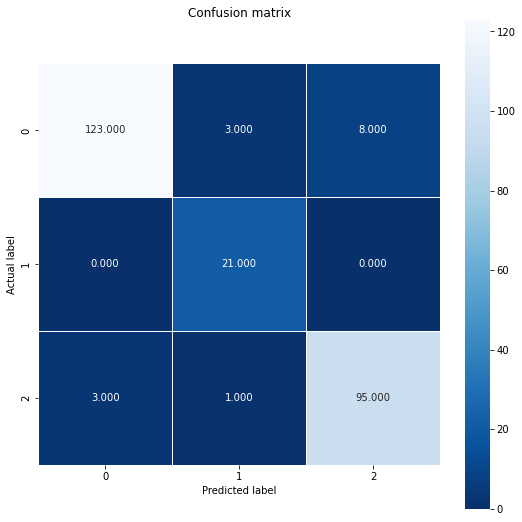

In [28]:
#plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cnf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', y=1.1)

In [29]:
print(classification_report(y_valid,model_best_part2.predict(X_valid) ))

              precision    recall  f1-score   support

          -1       0.98      0.92      0.95       134
           0       0.84      1.00      0.91        21
           1       0.92      0.96      0.94        99

    accuracy                           0.94       254
   macro avg       0.91      0.96      0.93       254
weighted avg       0.94      0.94      0.94       254



## selecting variable on best model from part-3

best combination (ACC: 0.900): (0, 1, 2, 3, 4, 6, 8)



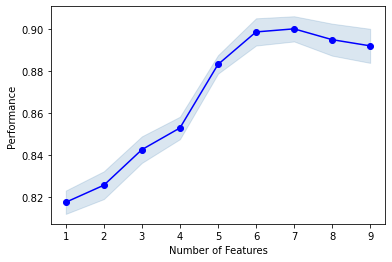

In [14]:
sfs_svc = SFS(estimator=SVC(kernel='rbf',C= 1, gamma=1), 
           k_features=(3, 9),
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5)


sfs_svc.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs_svc.k_score_, sfs_svc.k_feature_idx_))
# print('all subsets:\n', sfs1.subsets_)

plot_sfs(sfs_svc.get_metric_dict(), kind='std_err');

In [15]:
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sfs_svc.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.8007380073800738, 0.8265682656826568, 0.808...",0.817455,"(SFH,)"
2,"(0, 1)","[0.8081180811808119, 0.8302583025830258, 0.811...",0.825592,"(SFH, popUpWidnow)"
3,"(0, 1, 4)","[0.8228782287822878, 0.8597785977859779, 0.841...",0.842575,"(SFH, popUpWidnow, URL_of_Anchor)"
4,"(0, 1, 3, 4)","[0.8487084870848709, 0.8634686346863468, 0.837...",0.852926,"(SFH, popUpWidnow, Request_URL, URL_of_Anchor)"
5,"(0, 1, 2, 3, 4)","[0.8708487084870848, 0.8929889298892989, 0.874...",0.883231,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
6,"(0, 1, 2, 3, 4, 6)","[0.8745387453874539, 0.8966789667896679, 0.904...",0.898759,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
7,"(0, 1, 2, 3, 4, 6, 8)","[0.8782287822878229, 0.9003690036900369, 0.904...",0.900235,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.8708487084870848, 0.8929889298892989, 0.889...",0.895072,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8671586715867159, 0.8856088560885609, 0.889...",0.892117,"(SFH, popUpWidnow, SSLfinal_State, Request_URL..."


In [16]:
# X_selected = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL']]
X_selected_2 = data[['SFH','popUpWidnow','SSLfinal_State','Request_URL','URL_of_Anchor','URL_Length','having_IP_Address']]
y_selected_2 = data.Result.values

In [17]:
#splitting the train and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_selected_2, y_selected_2,random_state=42,stratify=y, test_size=0.25 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [18]:
from imblearn.over_sampling import SMOTE
X_sampled_2, y_sampled_2= SMOTE().fit_resample(X_train_full,y_train_full)

In [19]:
model_best_part3=SVC(kernel='rbf',probability=True,C= 1, gamma=1)
model_best_part3.fit(X_sampled_2,y_sampled_2)
model_best_part3

SVC(C=1, gamma=1, probability=True)

In [20]:
cnf_part2=confusion_matrix(y_valid,model_best_part3.predict(X_valid))
cnf_part2

array([[123,   3,   8],
       [  0,  19,   2],
       [  4,   3,  92]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

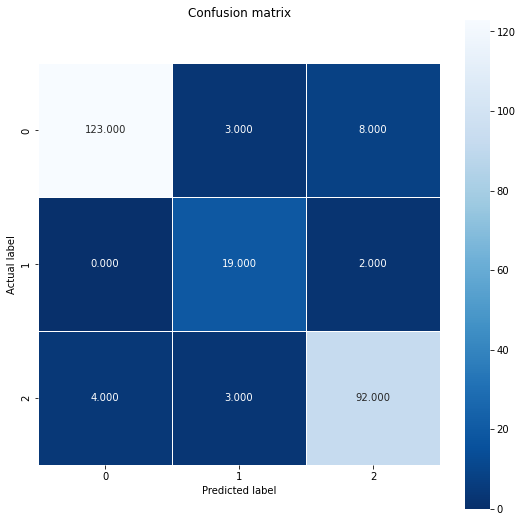

In [21]:
#plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cnf_part2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', y=1.1)

In [22]:
print(classification_report(y_valid,model_best_part3.predict(X_valid) ))

              precision    recall  f1-score   support

          -1       0.97      0.92      0.94       134
           0       0.76      0.90      0.83        21
           1       0.90      0.93      0.92        99

    accuracy                           0.92       254
   macro avg       0.88      0.92      0.89       254
weighted avg       0.93      0.92      0.92       254

